# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

pd.options.display.max_columns=100
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float.format", lambda x:'%.2f' %x)
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('Adult.csv')
df1 = df.copy()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education.num,32561.00,10.08,2.57,1.00,9.00,10.00,12.00,16.00
capital.gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital.loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours.per.week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [6]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
for i in df.columns:
    if df[i].nunique()<20:
        print(f"{'-'*18} {i} {'-'*18}\n")
        print(f"value counts of {i}:\n\n{df[i].value_counts(dropna =False)}\n") #In fact it is no necessary to use dropna 
    else:                                                                       #so, already no nan appearance in info()
        print(f"{'-'*18} {i} {'-'*18}\n")
        print(f"The number of  unique values for {i}: {df[i].nunique()}\n\n\n")
        
        
        

------------------ age ------------------

The number of  unique values for age: 73



------------------ workclass ------------------

value counts of workclass:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

------------------ fnlwgt ------------------

The number of  unique values for fnlwgt: 21648



------------------ education ------------------

value counts of education:

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

---------------

In [9]:
for col in df.select_dtypes(include="object").columns: #we are looking for question mark ('?') in object types columns
    print(f"{'-'*18} {col} {'-'*18}\n")
    print(f"value counts of {col}:\n\n{df[col].value_counts()}\n")

------------------ workclass ------------------

value counts of workclass:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

------------------ education ------------------

value counts of education:

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

------------------ marital.status ------------------

value counts of marital.status:

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated         

In [10]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
len(df[df.duplicated()])

24

In [12]:
df.shape

(32561, 15)

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(32537, 15)

In [15]:
def value_cnt(df,column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)
    
    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')
    df_result = pd.concat([vc[column_name],vc['counts'],vc_norm['norm_counts']],axis=1)
    
    return df_result

In [16]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [17]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [18]:
df['workclass']=df['workclass'].replace(['?'],np.nan)

In [19]:
df['workclass'].fillna('Private',inplace=True)

In [20]:
df.workclass.value_counts(dropna=False)

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [21]:
df['occupation'].value_counts(normalize=True)

Prof-specialty      0.13
Craft-repair        0.13
Exec-managerial     0.12
Adm-clerical        0.12
Sales               0.11
Other-service       0.10
Machine-op-inspct   0.06
?                   0.06
Transport-moving    0.05
Handlers-cleaners   0.04
Farming-fishing     0.03
Tech-support        0.03
Protective-serv     0.02
Priv-house-serv     0.00
Armed-Forces        0.00
Name: occupation, dtype: float64

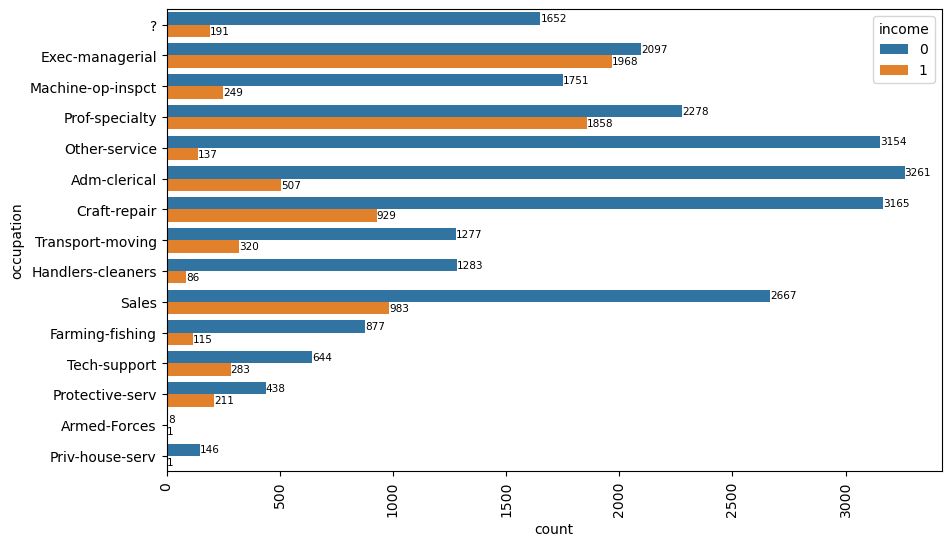

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df,y='occupation',hue=df['income'].map({'<=50K':0,'>50K':1}))
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['occupation'],size=7.5)
plt.xticks(rotation=90)    
plt.show();

In [23]:
#Let's look at education num  and education together
df.groupby('education')[['education','education.num']].value_counts(dropna=False)


education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  166
5th-6th       3                  332
7th-8th       4                  645
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5353
Doctorate     16                 413
HS-grad       9                10494
Masters       14                1722
Preschool     1                   50
Prof-school   15                 576
Some-college  10                7282
dtype: int64

In [24]:
df['native.country'].value_counts(normalize=True)

United-States                0.90
Mexico                       0.02
?                            0.02
Philippines                  0.01
Germany                      0.00
Canada                       0.00
Puerto-Rico                  0.00
El-Salvador                  0.00
India                        0.00
Cuba                         0.00
England                      0.00
Jamaica                      0.00
South                        0.00
China                        0.00
Italy                        0.00
Dominican-Republic           0.00
Vietnam                      0.00
Guatemala                    0.00
Japan                        0.00
Poland                       0.00
Columbia                     0.00
Taiwan                       0.00
Haiti                        0.00
Iran                         0.00
Portugal                     0.00
Nicaragua                    0.00
Peru                         0.00
Greece                       0.00
France                       0.00
Ecuador       

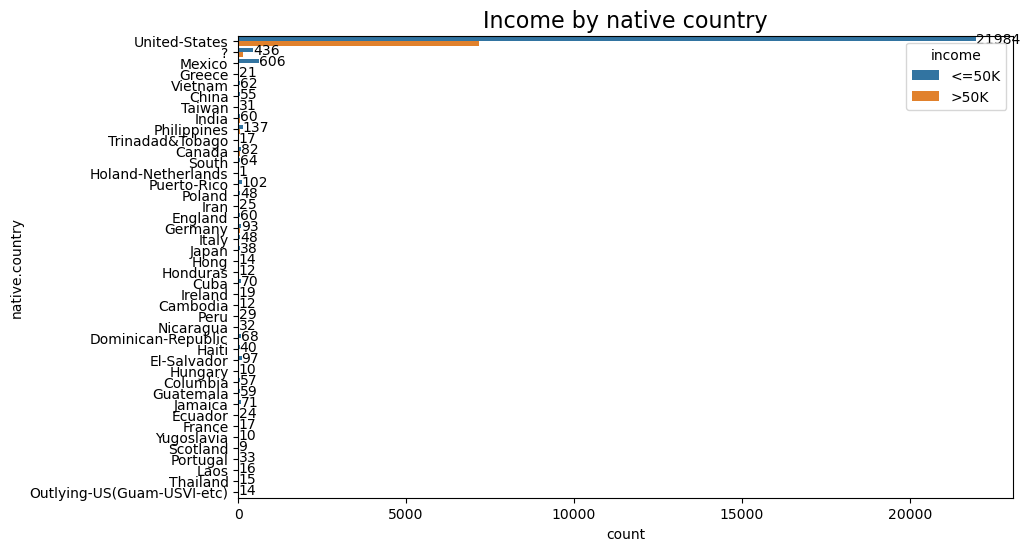

In [25]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df,y='native.country',hue='income')
plt.title("Income by native country",fontsize = 16)
ax.bar_label(ax.containers[0]);

In [26]:
df['native.country'][df['native.country']!='United-States']='Others'

In [27]:
df['native.country'].unique()

array(['United-States', 'Others'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='Count'>

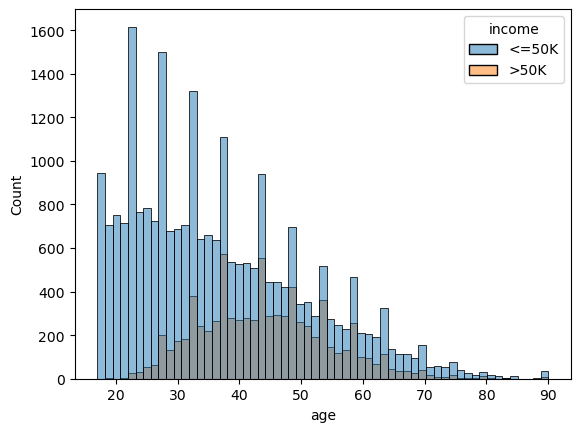

In [28]:
sns.histplot(df, x='age',hue='income')

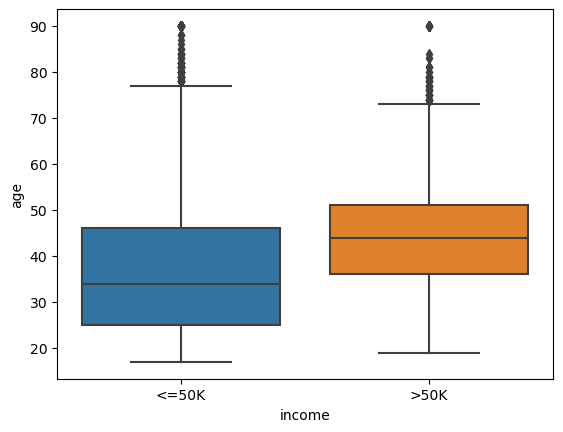

In [29]:
sns.boxplot(data=df,y='age',x='income',whis=1.5);

In [30]:
df['income'].value_counts().keys()

Index(['<=50K', '>50K'], dtype='object')

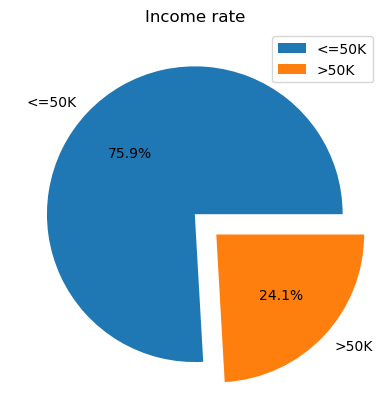

In [31]:
plt.pie(df['income'].value_counts(),labels=df['income'].value_counts().keys(),autopct="%.1f%%",explode = [0,0.2])
plt.legend()                                              #following f adding double % lead to add % on chart
plt.title('Income rate');

In [32]:
df.income=df.income.map({'<=50K':0,'>50K':1})

In [33]:
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [34]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.00,-0.08,0.04,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02,-0.01
education.num,0.04,-0.04,1.00,0.12,0.08,0.15,0.34
capital.gain,0.08,0.00,0.12,1.00,-0.03,0.08,0.22
capital.loss,0.06,-0.01,0.08,-0.03,1.00,0.05,0.15
hours.per.week,0.07,-0.02,0.15,0.08,0.05,1.00,0.23
income,0.23,-0.01,0.34,0.22,0.15,0.23,1.00


<AxesSubplot:>

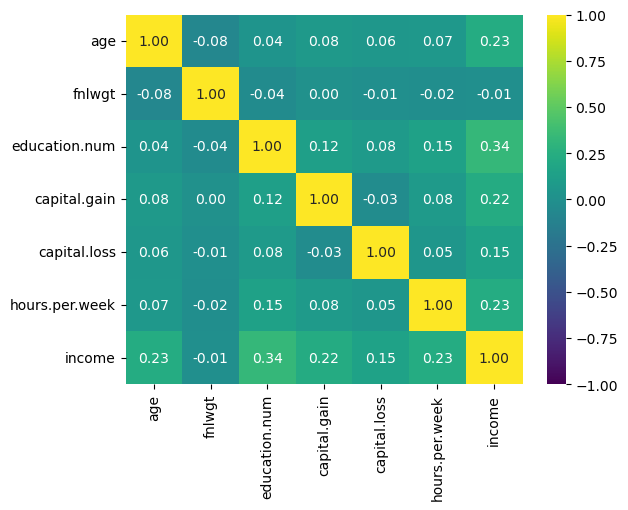

In [35]:
sns.heatmap(df.corr(),annot=True,vmin=-1,fmt='.2f',cmap='viridis') #vmin allow you start chart from -1 so this corr chart to make ense from -1

In [36]:
#sns.pairplot(df,hue='income',corner=True)

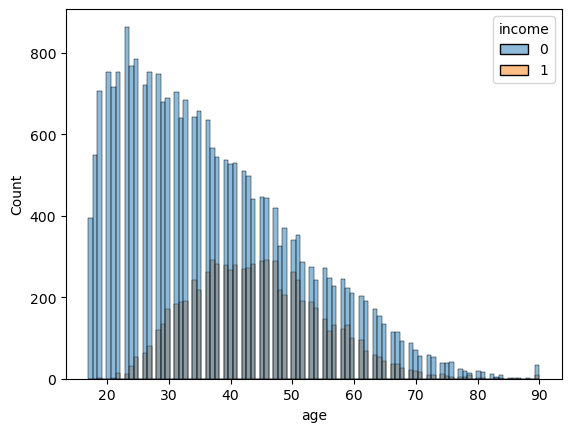

In [37]:
sns.histplot(df,x='age',hue='income',bins=100);

<AxesSubplot:xlabel='income', ylabel='age'>

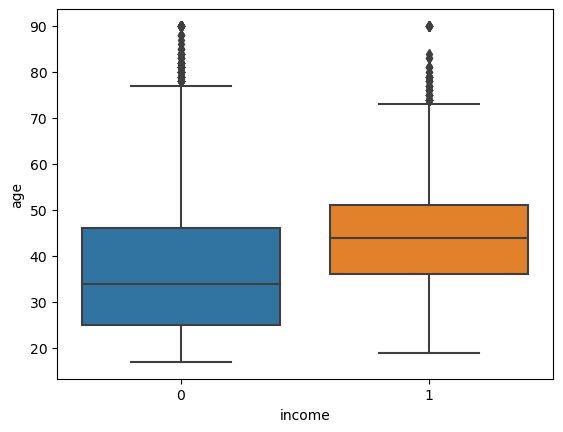

In [38]:
sns.boxplot(data=df,x='income',y='age')

In [39]:
value_cnt(df,'workclass')

,workclass,counts,norm_counts
0,Private,24509,0.75
1,Self-emp-not-inc,2540,0.08
2,Local-gov,2093,0.06
3,State-gov,1298,0.04
4,Self-emp-inc,1116,0.03
5,Federal-gov,960,0.03
6,Without-pay,14,0.00
7,Never-worked,7,0.00


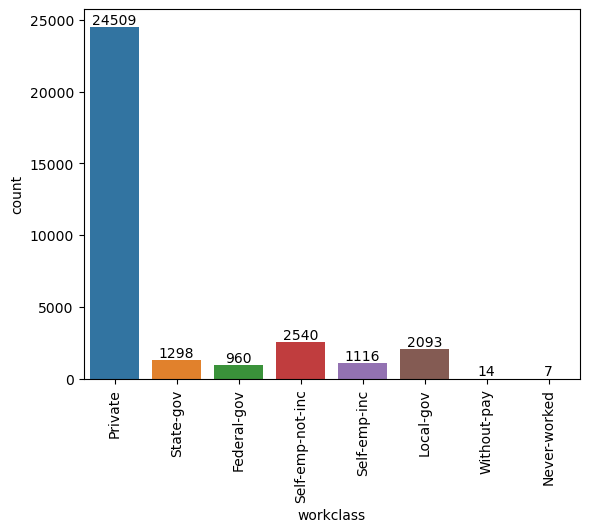

In [40]:
ax=sns.countplot(df['workclass'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

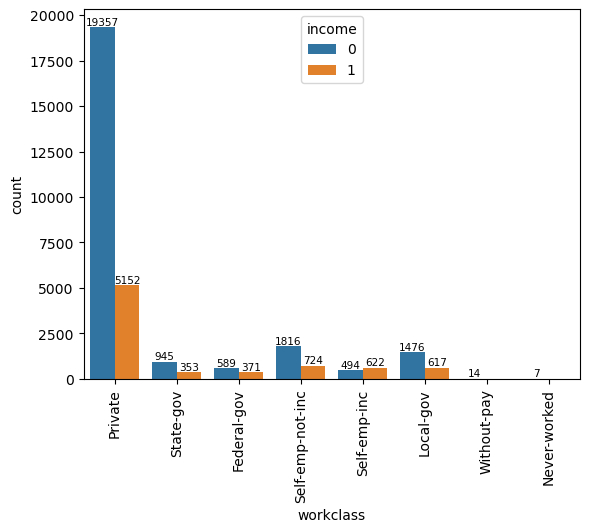

In [41]:
ax = sns.countplot(x=df.workclass,hue=df['income'])
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['workclass'],size=7.5)
plt.xticks(rotation=90)    
plt.show();

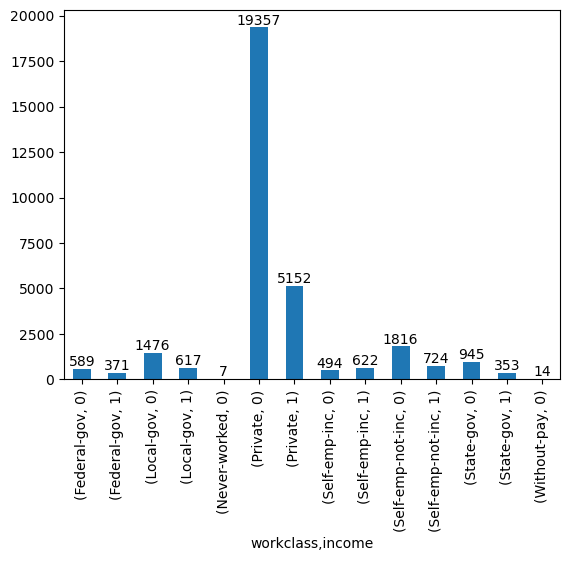

In [42]:
ax=df.groupby(['workclass','income'])['workclass'].count().plot.bar()
for container in ax.containers:
    ax.bar_label(container)

In [43]:
np.arange(0, 1000001, 10000.0)

array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
         60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.,  160000.,  170000.,
        180000.,  190000.,  200000.,  210000.,  220000.,  230000.,
        240000.,  250000.,  260000.,  270000.,  280000.,  290000.,
        300000.,  310000.,  320000.,  330000.,  340000.,  350000.,
        360000.,  370000.,  380000.,  390000.,  400000.,  410000.,
        420000.,  430000.,  440000.,  450000.,  460000.,  470000.,
        480000.,  490000.,  500000.,  510000.,  520000.,  530000.,
        540000.,  550000.,  560000.,  570000.,  580000.,  590000.,
        600000.,  610000.,  620000.,  630000.,  640000.,  650000.,
        660000.,  670000.,  680000.,  690000.,  700000.,  710000.,
        720000.,  730000.,  740000.,  750000.,  760000.,  770000.,
        780000.,  790000.,  800000.,  810000.,  820000.,  830000.,
        840000.,  850000.,  860000.,  870000.,  880000.,  8900

In [44]:
df.fnlwgt.max()

1484705

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

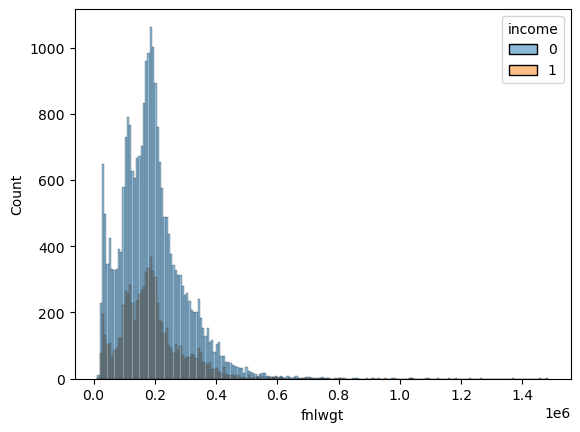

In [45]:
sns.histplot(df,x='fnlwgt',hue='income')


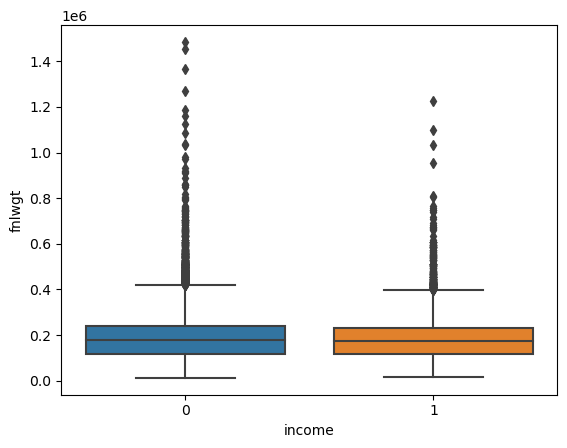

In [46]:
sns.boxplot(data=df,y='fnlwgt',x='income');

In [47]:
#fnlwgt is meaningless for our model we drop it form dataset

df.drop('fnlwgt',inplace=True,axis=1)

In [48]:
value_cnt(df,'education')

,education,counts,norm_counts
0,HS-grad,10494,0.32
1,Some-college,7282,0.22
2,Bachelors,5353,0.16
3,Masters,1722,0.05
4,Assoc-voc,1382,0.04
5,11th,1175,0.04
6,Assoc-acdm,1067,0.03
7,10th,933,0.03
8,7th-8th,645,0.02
9,Prof-school,576,0.02


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

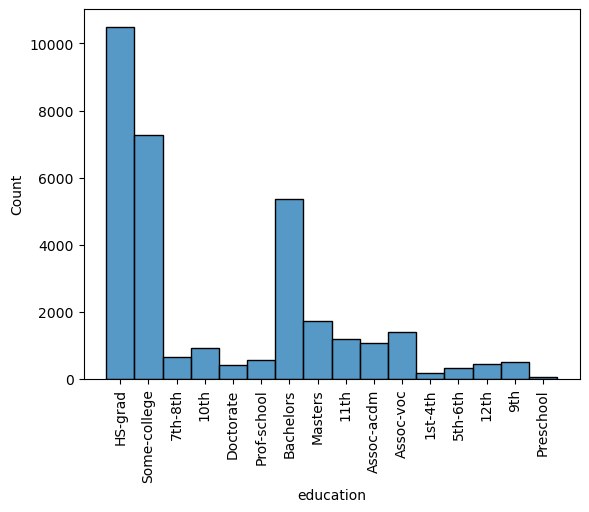

In [49]:
sns.histplot(df,x='education')
plt.xticks(rotation=90)

In [50]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [51]:
df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',inplace=True)
#better to decrease column number so we encoded those categorical values

In [52]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
School           4248
Masters          1722
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [53]:
df1.groupby(['education','education.num'])[['education','education.num']].count() #i used here df1 which prior form of df
                                #so here education and education num totally reflect eachother we can drop education num 

,,education,education.num
education,education.num,,
10th,6,933,933
11th,7,1175,1175
12th,8,433,433
1st-4th,2,168,168
5th-6th,3,333,333
7th-8th,4,646,646
9th,5,514,514
Assoc-acdm,12,1067,1067
Assoc-voc,11,1382,1382


In [54]:
value_cnt(df,'marital.status')

,marital.status,counts,norm_counts
0,Married-civ-spouse,14970,0.46
1,Never-married,10667,0.33
2,Divorced,4441,0.14
3,Separated,1025,0.03
4,Widowed,993,0.03
5,Married-spouse-absent,418,0.01
6,Married-AF-spouse,23,0.00


In [55]:
value_cnt(df,'relationship')

,relationship,counts,norm_counts
0,Husband,13187,0.41
1,Not-in-family,8292,0.25
2,Own-child,5064,0.16
3,Unmarried,3445,0.11
4,Wife,1568,0.05
5,Other-relative,981,0.03


In [56]:
value_cnt(df,'race')

,race,counts,norm_counts
0,White,27795,0.85
1,Black,3122,0.10
2,Asian-Pac-Islander,1038,0.03
3,Amer-Indian-Eskimo,311,0.01
4,Other,271,0.01


In [57]:
df.race.replace(['Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],'Others',inplace=True)

In [58]:
value_cnt(df,'race')

,race,counts,norm_counts
0,White,27795,0.85
1,Black,3122,0.10
2,Others,1620,0.05


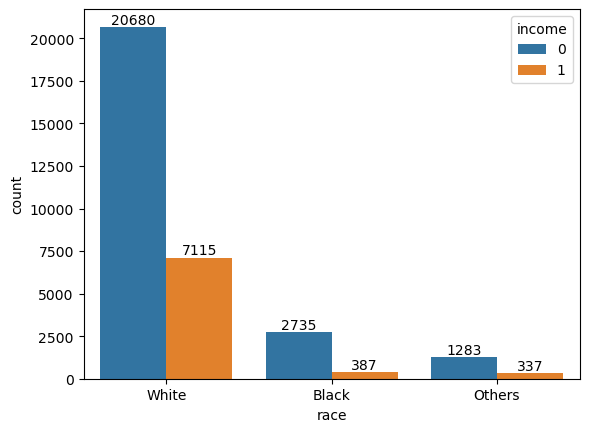

In [59]:
ax = sns.countplot(x=df.race,hue=df['income'])
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['race'])
plt.show();

In [60]:
value_cnt(df,'sex')

,sex,counts,norm_counts
0,Male,21775,0.67
1,Female,10762,0.33


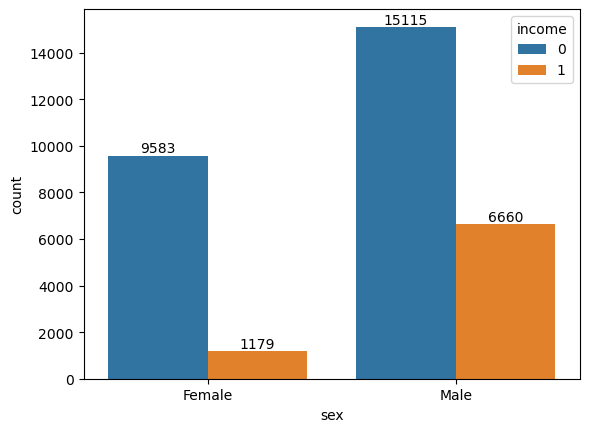

In [61]:
ax=sns.countplot(df['sex'],hue=df.income)
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['sex'])
plt.show();

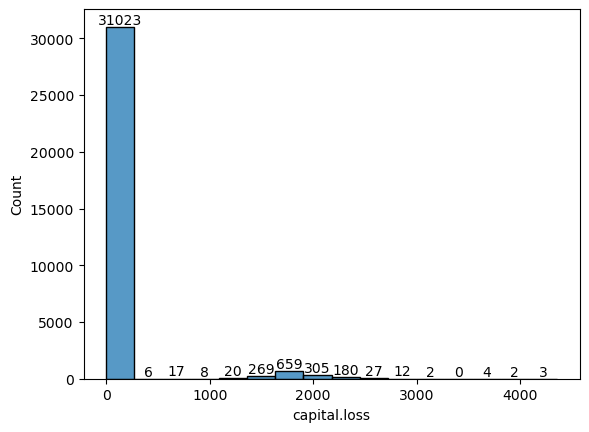

In [62]:
ax=sns.histplot(df,x='capital.loss')
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['capital.loss'])
plt.show();

In [63]:
df['capital.gain'].agg(['max','min'])

max    99999
min        0
Name: capital.gain, dtype: int64

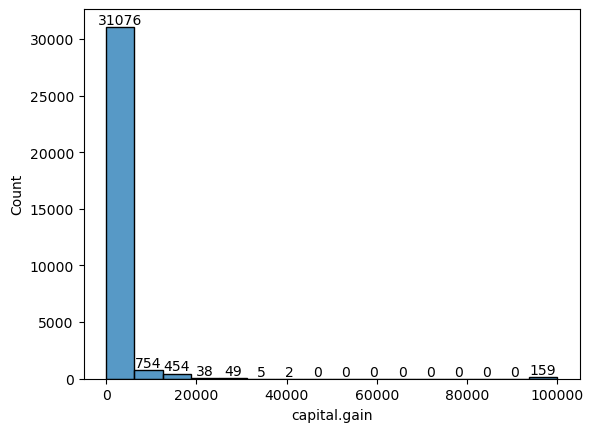

In [64]:
ax=sns.histplot(df,x='capital.gain')
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['capital.gain'])
plt.show();

In [65]:
df['capital.loss'].agg(['max','min'])

max    4356
min       0
Name: capital.loss, dtype: int64

In [66]:
df['capital_diff'] = df['capital.gain']-df['capital.loss']
df['capital_diff']=pd.cut(df['capital_diff'],bins=[-5000,5000,100000],labels=['Low','High'])
df['capital_diff']=df['capital_diff'].astype('object')
df.drop(['capital.gain'],axis=1,inplace=True)
df.drop(['capital.loss'],axis=1,inplace=True)

In [67]:
value_cnt(df,'capital_diff')

,capital_diff,counts,norm_counts
0,Low,30889,0.95
1,High,1648,0.05


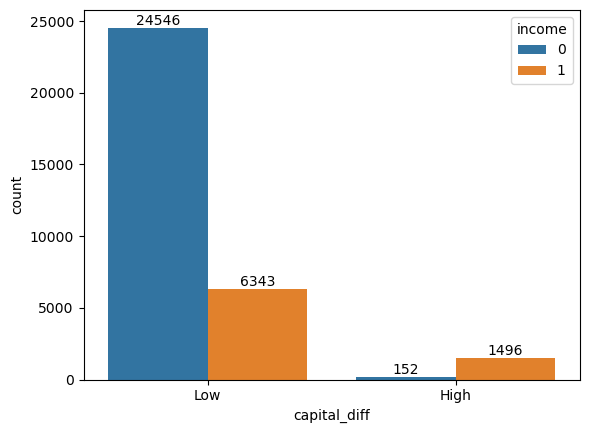

In [68]:
ax=sns.countplot(df['capital_diff'],hue=df['income'])
for container in ax.containers:
    df_hue = df.loc[df['income']==container.get_label()]
    ax.bar_label(container, labels=df_hue['capital_diff'])
plt.show();

In [69]:
df['hours.per.week'].max()

99

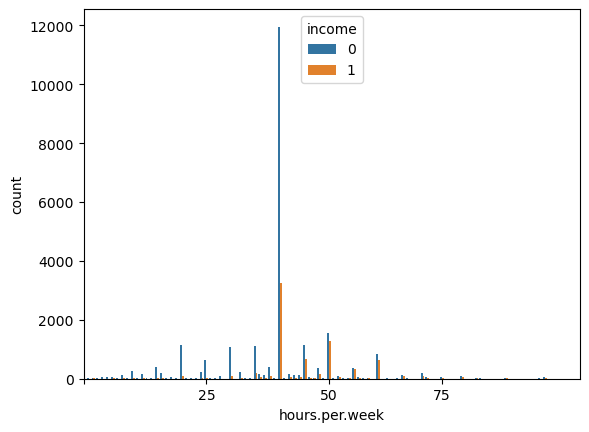

In [70]:
ax=sns.countplot(df['hours.per.week'],hue=df['income'])
ax.set(xlim=[0,100],xticks=[-1,24,49,72]);

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

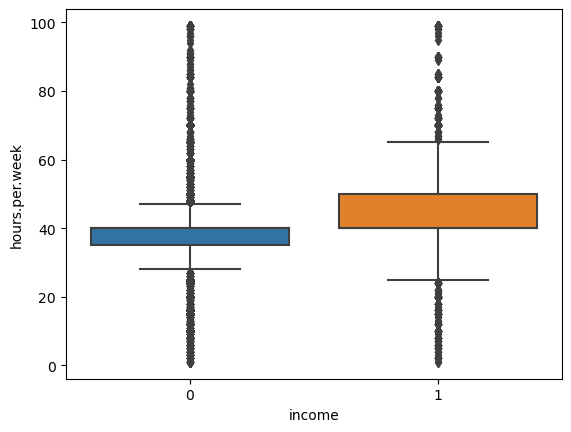

In [71]:
sns.boxplot(data=df,y='hours.per.week',x='income')

In [72]:
df.groupby('workclass').workclass.value_counts().keys()

MultiIndex([(     'Federal-gov',      'Federal-gov'),
            (       'Local-gov',        'Local-gov'),
            (    'Never-worked',     'Never-worked'),
            (         'Private',          'Private'),
            (    'Self-emp-inc',     'Self-emp-inc'),
            ('Self-emp-not-inc', 'Self-emp-not-inc'),
            (       'State-gov',        'State-gov'),
            (     'Without-pay',      'Without-pay')],
           names=['workclass', 'workclass'])

In [73]:
[print(f"hours.per.week for {j}\n{df[df.workclass==j]['hours.per.week'].agg(['min','max'])}\n")  for j in df.workclass.unique()]

hours.per.week for Private
min     1
max    99
Name: hours.per.week, dtype: int64

hours.per.week for State-gov
min     1
max    99
Name: hours.per.week, dtype: int64

hours.per.week for Federal-gov
min     4
max    99
Name: hours.per.week, dtype: int64

hours.per.week for Self-emp-not-inc
min     1
max    99
Name: hours.per.week, dtype: int64

hours.per.week for Self-emp-inc
min     1
max    99
Name: hours.per.week, dtype: int64

hours.per.week for Local-gov
min     2
max    99
Name: hours.per.week, dtype: int64

hours.per.week for Without-pay
min    10
max    65
Name: hours.per.week, dtype: int64

hours.per.week for Never-worked
min     4
max    40
Name: hours.per.week, dtype: int64



[None, None, None, None, None, None, None, None]

In [74]:
df[df.workclass=='Never-worked']['hours.per.week']

8874     40
13675    35
17089    30
21934    10
24483    40
32331    40
32338     4
Name: hours.per.week, dtype: int64

In [75]:
inx_never = df[df.workclass=='Never-worked']['hours.per.week'].index

In [76]:
df.loc[inx_never,'hours.per.week']=0

In [77]:
df[df.workclass=='Never-worked']

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital_diff
8874,18,Never-worked,School,6,Never-married,?,Own-child,White,Male,0,United-States,0,Low
13675,23,Never-worked,School,4,Divorced,?,Not-in-family,White,Male,0,United-States,0,Low
17089,17,Never-worked,School,6,Never-married,?,Own-child,White,Male,0,United-States,0,Low
21934,18,Never-worked,School,7,Never-married,?,Own-child,White,Female,0,United-States,0,Low
24483,20,Never-worked,Some-college,10,Never-married,?,Own-child,Black,Male,0,United-States,0,Low
32331,30,Never-worked,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,United-States,0,Low
32338,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,United-States,0,Low


In [78]:
df.loc[inx_never,'occupation'] = 'others'

In [79]:
df[df.workclass=='Never-worked']

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital_diff
8874,18,Never-worked,School,6,Never-married,others,Own-child,White,Male,0,United-States,0,Low
13675,23,Never-worked,School,4,Divorced,others,Not-in-family,White,Male,0,United-States,0,Low
17089,17,Never-worked,School,6,Never-married,others,Own-child,White,Male,0,United-States,0,Low
21934,18,Never-worked,School,7,Never-married,others,Own-child,White,Female,0,United-States,0,Low
24483,20,Never-worked,Some-college,10,Never-married,others,Own-child,Black,Male,0,United-States,0,Low
32331,30,Never-worked,HS-grad,9,Married-civ-spouse,others,Wife,Black,Female,0,United-States,0,Low
32338,18,Never-worked,Some-college,10,Never-married,others,Own-child,White,Male,0,United-States,0,Low


In [80]:
df.isin(['?']).sum()

age                  0
workclass            0
education            0
education.num        0
marital.status       0
occupation        1836
relationship         0
race                 0
sex                  0
hours.per.week       0
native.country       0
income               0
capital_diff         0
dtype: int64

In [81]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv', 'others'], dtype=object)

In [82]:
pd.options.display.max_rows=10000
df[df['occupation']=='?'].groupby(['workclass','occupation'])[['workclass','occupation','hours.per.week']].value_counts().to_frame()

0
workclass occupation hours.per.week     
Private   ?          40              689
                     20              158
                     30              138
                     35               93
                     25               92
                     50               56
                     15               54
                     10               51
                     8                42
                     60               34
                     45               33
                     24               32
                     12               30
                     32               27
                     4                25
                     6                24
                     16               23
                     5                21
                     2                17
                     3                15
                     36               15
                     48               14
                     28               12
                     38               12
                     1                12
                     18               11
                     55               10
                     80                9
                     70                7
                     56                6
                     7                 6
                     99                5
                     22                5
                     14                5
                     13                4
                     84                4
                     42                4
                     37                3
                     72                3
                     75                3
                     43                3
                     44                2
                     65                2
                     49                2
                     41                2
                     27                2
                     53                2
                     54                2
                     17                2
                     11                2
                     9                 1
                     90                1
                     33                1
                     52                1
                     58                1
                     21                1
                     46                1
                     23                1
                     39                1
                     29                1
                     34                1

In [83]:
df[((df['hours.per.week']==40) & (df.occupation=='?'))].groupby('workclass').count()

,age,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital_diff
workclass,,,,,,,,,,,,
Private,689,689,689,689,689,689,689,689,689,689,689,689


In [84]:
#df.hourscategory=pd.cut(df['hours.per.week'],bins=np.linspace(0,100,11),labels=np.arange(1,11))

In [85]:
np.linspace(0,100,11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [86]:
df.groupby('occupation')[['occupation','hours.per.week']].value_counts().to_frame().sort_values(by=['hours.per.week'],ascending =False)

,,0
occupation,hours.per.week,
Priv-house-serv,99,2
Craft-repair,99,7
Protective-serv,99,3
?,99,5
Exec-managerial,99,12
Sales,99,3
Other-service,99,11
Transport-moving,99,10
Prof-specialty,99,18


In [87]:
df[df.occupation=='?'].groupby('hours.per.week')['hours.per.week'].count()

hours.per.week
1      12
2      17
3      15
4      25
5      21
6      24
7       6
8      42
9       1
10     51
11      2
12     30
13      4
14      5
15     54
16     23
17      2
18     11
20    158
21      1
22      5
23      1
24     32
25     92
27      2
28     12
29      1
30    138
32     27
33      1
34      1
35     93
36     15
37      3
38     12
39      1
40    689
41      2
42      4
43      3
44      2
45     33
46      1
48     14
49      2
50     56
52      1
53      2
54      2
55     10
56      6
58      1
60     34
65      2
70      7
72      3
75      3
80      9
84      4
90      1
99      5
Name: hours.per.week, dtype: int64

In [88]:
idx_list = []
for i in range(1,100):    
        idx = df[(df['occupation']=="?") & (df['hours.per.week']==i)].index
        idx_list.append(idx)
        if len(idx):
            df.loc[idx,'occupation'] = df[(df['hours.per.week']==i) & (df['occupation']!='?')]['occupation'].value_counts().idxmax()

In [89]:
idx_list

[Int64Index([4086, 5327, 9077, 9115, 9232, 9272, 11576, 12183, 21063, 21709,
             30121, 32528],
            dtype='int64'),
 Int64Index([ 1917,  4300,  5130,  5493,  6760,  7073,  8702, 10337, 15454,
             15549, 22128, 22164, 23504, 23739, 29549, 31528, 31566],
            dtype='int64'),
 Int64Index([ 1508,  5941,  6467,  7490,  9368, 13856, 15092, 16590, 19469,
             20220, 24235, 25333, 27132, 30962, 32500],
            dtype='int64'),
 Int64Index([ 4224,  4827,  8101,  8941, 12346, 13564, 14721, 15223, 15593,
             16268, 17459, 17818, 17856, 17966, 20109, 20119, 24215, 24836,
             26231, 26583, 26865, 29501, 31776, 31811, 31923],
            dtype='int64'),
 Int64Index([ 1204,  1750,  4131,  4616,  5034,  6055,  6758,  7005,  9602,
             14042, 20240, 22359, 26458, 28287, 29337, 29782, 30077, 30470,
             30512, 31007, 32341],
            dtype='int64'),
 Int64Index([  114,  2297,  2525,  2949,  5421,  8346,  9997, 10944, 11600,

In [90]:
df.occupation

0             Craft-repair
1          Exec-managerial
2             Craft-repair
3        Machine-op-inspct
4           Prof-specialty
               ...        
32556      Protective-serv
32557         Tech-support
32558    Machine-op-inspct
32559         Adm-clerical
32560         Adm-clerical
Name: occupation, Length: 32537, dtype: object

In [91]:
df.occupation.value_counts()

Craft-repair         4805
Exec-managerial      4225
Prof-specialty       4207
Other-service        4120
Adm-clerical         3786
Sales                3684
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       999
Tech-support          927
Protective-serv       655
Priv-house-serv       147
Armed-Forces            9
others                  7
Name: occupation, dtype: int64

In [92]:
for i in idx_list:
    print(df.loc[i,'occupation'].value_counts())

Exec-managerial    12
Name: occupation, dtype: int64
Prof-specialty    17
Name: occupation, dtype: int64
Prof-specialty    15
Name: occupation, dtype: int64
Other-service    25
Name: occupation, dtype: int64
Sales    21
Name: occupation, dtype: int64
Other-service    24
Name: occupation, dtype: int64
Other-service    6
Name: occupation, dtype: int64
Other-service    42
Name: occupation, dtype: int64
Other-service    1
Name: occupation, dtype: int64
Other-service    51
Name: occupation, dtype: int64
Prof-specialty    2
Name: occupation, dtype: int64
Other-service    30
Name: occupation, dtype: int64
Other-service    4
Name: occupation, dtype: int64
Other-service    5
Name: occupation, dtype: int64
Other-service    54
Name: occupation, dtype: int64
Other-service    23
Name: occupation, dtype: int64
Other-service    2
Name: occupation, dtype: int64
Sales    11
Name: occupation, dtype: int64
Series([], Name: occupation, dtype: int64)
Other-service    158
Name: occupation, dtype: int64
Prof

In [93]:
df.isin(['?']).sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
capital_diff      0
dtype: int64